In [73]:
from sklearn.neighbors import KNeighborsClassifier as kNC
from sklearn.tree import DecisionTreeClassifier as DTC

# Boosting
from sklearn.ensemble import AdaBoostClassifier as AdaC
from sklearn.ensemble import GradientBoostingClassifier as GBC

from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve

import matplotlib.pyplot as plt

import numpy as np

# import dataset packages
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split

# import from project files
from utils import plot_2d, plot_classifier_boundary, test_model
from plots import plot_test_training_err, plot_test_training_auc, plot_tree_compare
from evaluation import dt_classifier_auc, dt_classifier_score, get_auc_gbc_trees, get_auc_ada_trees

## Dataset Generation ## 

### Decision Trees ###
Advantages:
+ Good with High Level Data: e.g. age, income

Disadvantages:
- Bad with Low Level Data: data with many predictors/inputs
- Trees can overfit: Overfitting increases with depth of tree


### Tree Boosting (ADA) ###

- gradient boosting may not be a good choice if you have a lot of noise, as it can result in overfitting

In [74]:
def data_dt():
    dt_X, dt_y = make_classification(
        n_samples=100,
        n_features=2, 
        n_redundant=0, 
        n_informative=2, 
        class_sep=0.2,
        flip_y=0.01, 
        n_clusters_per_class=1,
        weights=[0.9, 0.1],
        random_state=1,
    )

    # dt_X, dt_y = make_blobs(
    #     n_samples=[250, 50], 
    #     centers=[(3,5),(6,5)],             
    #     n_features=2, 
    #     cluster_std=[3, 1],
    #     random_state=42, 
    #     shuffle=False)

    return dt_X, dt_y

In [75]:
def data_tb():
    # tb_X, tb_y = make_blobs(
    #         n_samples=[700, 200], 
    #         centers=[(3,5),(6,5)],             
    #         n_features=2, 
    #         cluster_std=[5, 4],
    #         random_state=1, 
    #         shuffle=False
    # )

    # tb_X, tb_y = make_blobs(
    #     n_samples=[200, 200], 
    #     centers=[(3,5),(6,5)],             
    #     n_features=4, 
    #     # cluster_std=[2, 1],
    #     random_state=1, 
    #     shuffle=False)

    tb_X, tb_y = make_blobs(
        n_samples=1500,
        n_features=2,
        centers=220,
        cluster_std=.16,
        random_state=42
    )
    tb_y = tb_y % 2 # to reduce the amount of different labels to 2

    # tb_X, tb_y = make_blobs(
    #     n_samples=[250, 250], 
    #     centers=[(5,5),(6,5)],             
    #     n_features=2, 
    #     cluster_std=[1, 1],
    #     random_state=42, 
    #     )

    return tb_X, tb_y

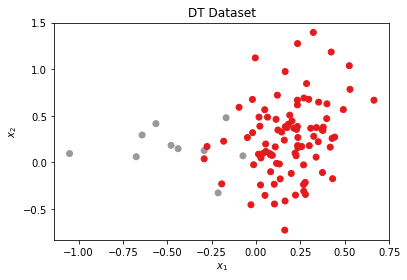

In [76]:
# Decision Tree data generation and splitup
dt_X, dt_y = data_dt()
# print('DT dataset shape X:', dt_X.shape)
# print('DT dataset shape Y:', dt_y.shape)
# print('DT dataset example row X:', dt_X[0])
# print('DT dataset example row Y:', dt_y[0])
plot_2d(dt_X, dt_y, 'DT Dataset')

dt_X_train, dt_X_test, dt_y_train, dt_y_test = train_test_split(dt_X, dt_y, test_size=.33, random_state=42)
# print('DT dataset shape X train:', dt_X_train.shape)
# print('DT dataset shape X test:', dt_X_test.shape)

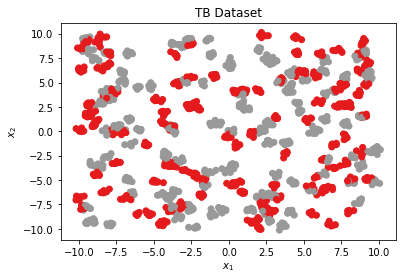

In [77]:
# TB data generation and splitup
tb_X, tb_y = data_tb()
# print('TB dataset shape X:', tb_X.shape)
# print('TB dataset shape Y:', tb_y.shape)
# print('TB dataset example row X:', tb_X[0])
# print('TB dataset example row Y:', tb_y[0])
plot_2d(tb_X, tb_y, 'TB Dataset')

tb_X_train, tb_X_test, tb_y_train, tb_y_test = train_test_split(tb_X, tb_y, test_size=.33, random_state=42)

## Evaluation and Plotting Methods ##

In [78]:

#  Underfitting – Validation and training error high
#  Overfitting – Validation error is high, training error low
#  Good fit – Validation error low, slightly higher than the training error
#  Unknown fit - Validation error low, training error 'high'


## Hyperparameters ##

In [128]:
# Hyperparameters

# DT
criterion = 'entropy'
# min_samples_split best between [2, 40] (see https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680)
# if value too small trees tend to overfit
# Imbalanced class problem: because then regions in which the minority class will be in majority 
# will be very small so min_samples_split should be lower
min_samples_split_tb = 8
min_samples_split_dt = 2
nsamples = np.arange(2, 60, 2)
max_depth_tb = None
max_depth_dt = None
ndepth = np.arange(1, 60, 5)

# Tree Boosting ADA
ntree=np.array([1,2,3,5,10,20,30,40,50, 100, 200,300])
nrates = np.arange(0.01, 2, 0.2)


## Decision Tree Dataset ##
### Comprare Performance DT and TB ###

Decision Trees on DT Dataset:
AUC score: 0.780
AUC score list: [0.484375, 0.7016129032258064, 0.8333333333333333, 1.0, 0.875, 0.75, 0.6499999999999999, 0.7338709677419355, 0.7999999999999999, 0.967741935483871]


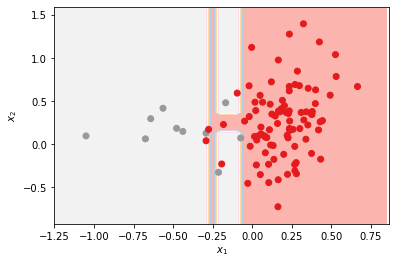

In [129]:
# Decision Trees

dtree=DTC(criterion=criterion, max_depth=max_depth_dt, min_samples_split=min_samples_split_dt)

print('Decision Trees on DT Dataset:')
test_model(dtree, dt_X, dt_y)
# plot_roc_curve(dtree, dt_X_test, dt_y_test)

# dtree.fit(dt_X_train, dt_y_train)
# print('DT score: %.2f' % (dtree.score(dt_X_test, dt_y_test)))
# plot_classifier_boundary(dtree, dt_X, dt_y, title='DT on DT dataset')
# plot_tree(dtree)

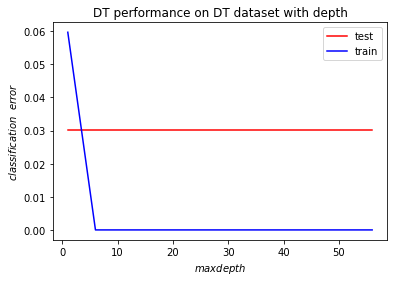

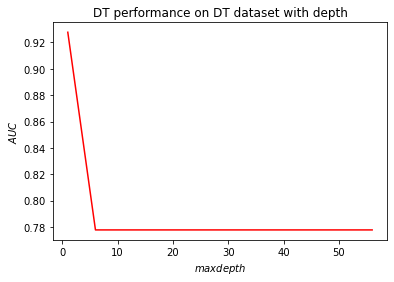

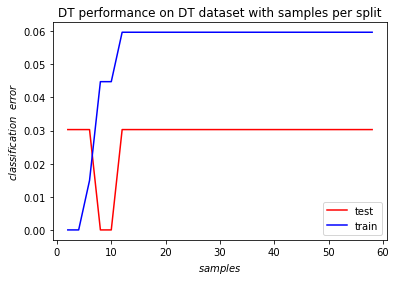

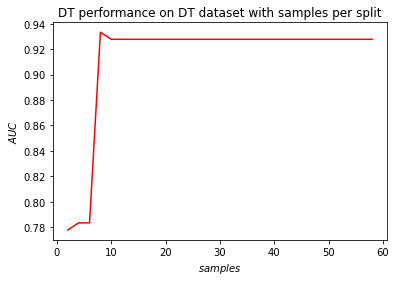

In [130]:
# DT Hyperparam Tuning
errors = map(lambda depth: dt_classifier_score(
    dt_X_train, dt_y_train, 
    dt_X_test, dt_y_test, 
    max_depth=depth,
    min_samples_split=min_samples_split_dt), ndepth)
plot_test_training_err(ndepth, errors, title='DT performance on DT dataset with depth', hyperparam='max depth')

aucs = map(lambda depth: dt_classifier_auc(dt_X, dt_y, max_depth=depth, min_samples_split=min_samples_split_dt), ndepth)
plot_test_training_auc(ndepth, aucs, title='DT performance on DT dataset with depth', hyperparam='max depth')


errors = map(lambda sample: dt_classifier_score(
    dt_X_train, dt_y_train, 
    dt_X_test, dt_y_test, 
    max_depth=max_depth_dt, 
    min_samples_split=sample), nsamples)
plot_test_training_err(nsamples, errors, title='DT performance on DT dataset with samples per split', hyperparam='samples')

aucs = map(lambda sample: dt_classifier_auc(dt_X, dt_y, max_depth=max_depth_dt, min_samples_split=sample), nsamples)
plot_test_training_auc(nsamples, aucs, title='DT performance on DT dataset with samples per split', hyperparam='samples')


Tree Boosting on DT dataset:
AUC score: 0.799
AUC score list: [0.7999999999999999, 0.75, 0.875, 0.7327586206896551, 0.9838709677419355, 0.875, 0.7338709677419355, 0.6077586206896551, 0.8464285714285714, 0.7833333333333333]


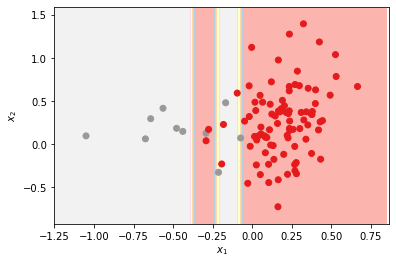

In [131]:
# TB

tboost = AdaC()

print('Tree Boosting on DT dataset:')
test_model(tboost, dt_X, dt_y)
# plot_roc_curve(tboost, dt_X_test, dt_y_test)

# tboost.fit(dt_X_train, dt_y_train)
# print('TB score: %.2f' % (tboost.score(dt_X_test, dt_y_test)))
# plot_classifier_boundary(tboost, dt_X, dt_y, title='TB on DT dataset')

Comparison on Decision Tree Dataset:


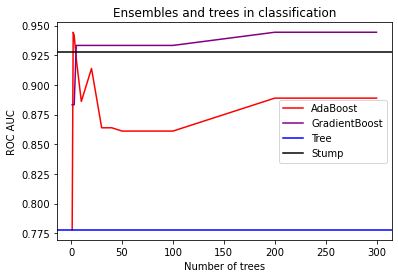

In [132]:
print('Comparison on Decision Tree Dataset:')

auc_ada_tree = map(lambda tree: get_auc_ada_trees(tree, dt_X, dt_y), ntree)
# auc_ada_tree = list(lambda tree: get_auc_ada_trees(tree, dt_X, dt_y, max_depth=max_depth_dt, min_samples_split=min_samples_split_dt), ntree)
auc_gbc_tree = map(lambda tree: get_auc_gbc_trees(tree, dt_X, dt_y), ntree)
# auc_gbc_tree = list(lambda tree: get_auc_gbc_trees(tree, dt_X, dt_y, max_depth=max_depth_dt, min_samples_split=min_samples_split_dt), ntree)
auc_tree = dt_classifier_auc(dt_X, dt_y, max_depth=None, min_samples_split=min_samples_split_dt)
auc_decision_stump = dt_classifier_auc(dt_X, dt_y, max_depth=1, min_samples_split=min_samples_split_dt)

plot_tree_compare(ntree, auc_ada_tree, auc_gbc_tree, auc_tree, auc_decision_stump)

## Dataset TB ##
### Compare Performance DT and TB ###

Decision Tree on TB Dataset:
AUC score: 0.840
AUC score list: [0.8322803408756979, 0.8426633362719169, 0.8420888465705749, 0.8522957350924173, 0.830754494547598, 0.8219009209065379, 0.8729277703299219, 0.8323293172690763, 0.8523176428314767, 0.8168166939443535]


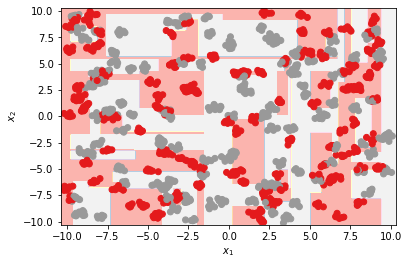

In [137]:
# Decision Trees

dtree=DTC(criterion=criterion, max_depth=max_depth_tb, min_samples_split=min_samples_split_tb)

print('Decision Tree on TB Dataset:')
test_model(dtree, tb_X, tb_y)
# plot_roc_curve(dtree, tb_X_test, tb_y_test)

# dtree.fit(tb_X_train, tb_y_train)
# print('DT score: %.2f' % (dtree.score(tb_X_test, tb_y_test)))
# plot_classifier_boundary(dtree, tb_X, tb_y, title='DT on TB dataset')
# plot_tree(dtree)

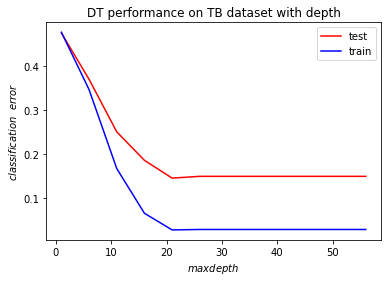

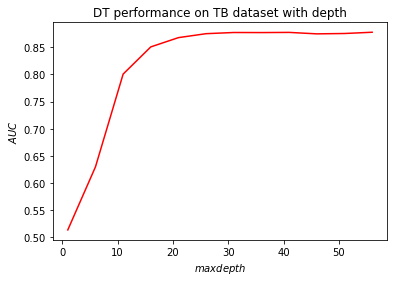

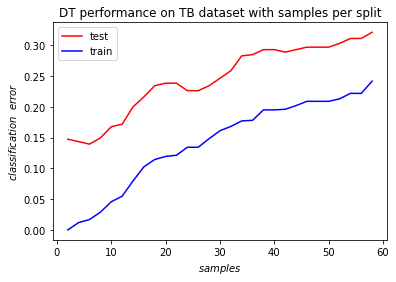

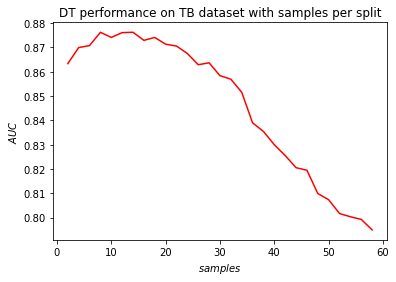

In [134]:
# DT Hyperparam Tuning

errors = map(lambda depth: dt_classifier_score(
    tb_X_train, tb_y_train, 
    tb_X_test, tb_y_test, 
    max_depth=depth,
    min_samples_split=min_samples_split_tb), ndepth)
plot_test_training_err(ndepth, errors, title='DT performance on TB dataset with depth', hyperparam='max depth')

aucs = map(lambda depth: dt_classifier_auc(tb_X, tb_y, max_depth=depth, min_samples_split=min_samples_split_tb), ndepth)
plot_test_training_auc(ndepth, aucs, title='DT performance on TB dataset with depth', hyperparam='max depth')


errors = map(lambda sample: dt_classifier_score(
    tb_X_train, tb_y_train, 
    tb_X_test, tb_y_test, 
    max_depth=max_depth_tb, 
    min_samples_split=sample), nsamples)

plot_test_training_err(nsamples, errors, title='DT performance on TB dataset with samples per split', hyperparam='samples')

aucs = map(lambda sample: dt_classifier_auc(tb_X, tb_y, max_depth=max_depth_tb, min_samples_split=sample), nsamples)
plot_test_training_auc(nsamples, aucs, title='DT performance on TB dataset with samples per split', hyperparam='samples')


Tree Boosting on TB Dataset:
AUC score: 0.617
AUC score list: [0.606425702811245, 0.667391304347826, 0.5923225321256907, 0.592938775510204, 0.6172770934753488, 0.6121314526398276, 0.5945857260049221, 0.6513409961685824, 0.6344362745098039, 0.6049357486185135]


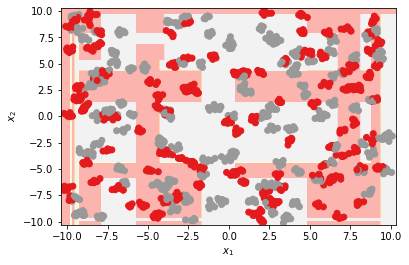

In [135]:
# Tree Boosting

tboost = AdaC()

print('Tree Boosting on TB Dataset:')
test_model(tboost, tb_X, tb_y)

# tboost.fit(tb_X_train, tb_y_train)
# print('TB score: %.2f' % (tboost.score(tb_X_test, tb_y_test)))
# plot_classifier_boundary(tboost, tb_X, tb_y, title='TB on TB dataset')

Comparison on Tree Boost Dataset:


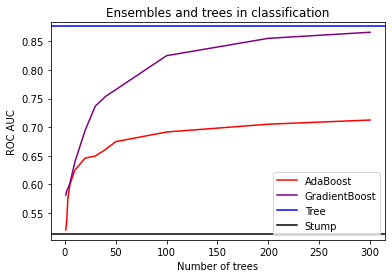

In [136]:
print('Comparison on Tree Boost Dataset:')

auc_ada_tree = map(lambda tree: get_auc_ada_trees(tree, tb_X, tb_y), ntree)
# auc_ada_tree = list(lambda tree: get_auc_ada_trees(tree, tb_X, tb_y, max_depth=max_depth_tb, min_samples_split=min_samples_split_tb), ntree)
auc_gbc_tree = map(lambda tree: get_auc_gbc_trees(tree, tb_X, tb_y), ntree)
# auc_gbc_tree = list(lambda tree: get_auc_gbc_trees(tree, tb_X, tb_y, max_depth=max_depth_tb, min_samples_split=min_samples_split_tb), ntree)
auc_tree = dt_classifier_auc(tb_X, tb_y, max_depth=None, min_samples_split=min_samples_split_tb)
auc_decision_stump = dt_classifier_auc(tb_X, tb_y, max_depth=1, min_samples_split=min_samples_split_tb)

plot_tree_compare(ntree, auc_ada_tree, auc_gbc_tree, auc_tree, auc_decision_stump)